<a href="https://colab.research.google.com/github/sebdisiena/Simple-Keras-Model/blob/master/perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# train a signle layer neural network to classify a dataset into 2 discrete classes using the keras library
import numpy as np
import tensorflow as tf
# sequential is a linear stack of layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline

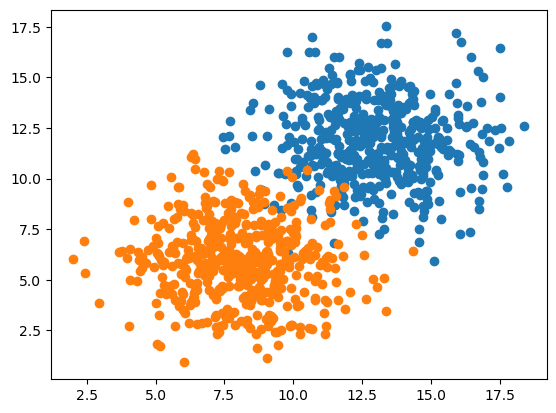

In [5]:
n_pts = 500
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts),
               np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts),
               np.random.normal(6, 2, n_pts)]).T

X = np.vstack((Xa, Xb))
y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T

plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

In [7]:
model = Sequential()
# 1 layer perceptron with 2 input nodes and one output node and implements the
# sigmoid activation function
model.add(Dense(units=1, input_shape=(2,), activation='sigmoid'))
# adaptive method learning algorithms - Stochastic optimization
adam = Adam(learning_rate = 0.1)
# binary as outputs are either 0 or 1 as 2 classes, metric to detmerine the accuracy
model.compile(adam, loss='binary_crossentropy', metrics=['accuracy'])
# epoch is times it iterates over entire data set, shuffle to avoid local minimums
h = model.fit(x=X, y=y, verbose=1, batch_size=50, epochs=500, shuffle='true')

Epoch 1/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4286 - loss: 1.9324  
Epoch 2/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5791 - loss: 0.8873 
Epoch 3/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7808 - loss: 0.5152 
Epoch 4/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8812 - loss: 0.3809 
Epoch 5/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9116 - loss: 0.3205 
Epoch 6/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9439 - loss: 0.2830 
Epoch 7/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9469 - loss: 0.2680 
Epoch 8/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9656 - loss: 0.2364 
Epoch 9/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9521 - loss: 0.2254 
Epoch 10/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9653 - loss: 0.1939 
Epoch 11/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9617 - loss: 0.1937 
Epoch 12/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

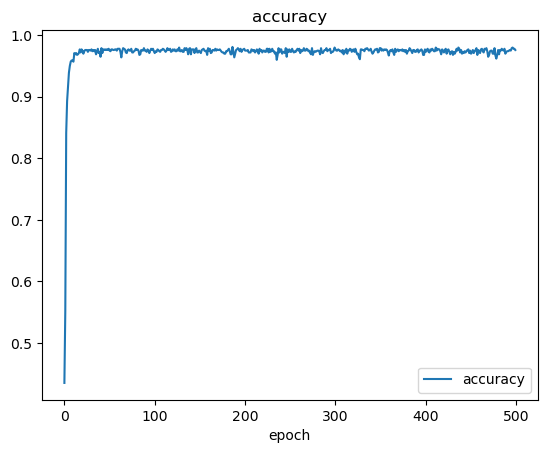

In [8]:
plt.plot(h.history['accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'])

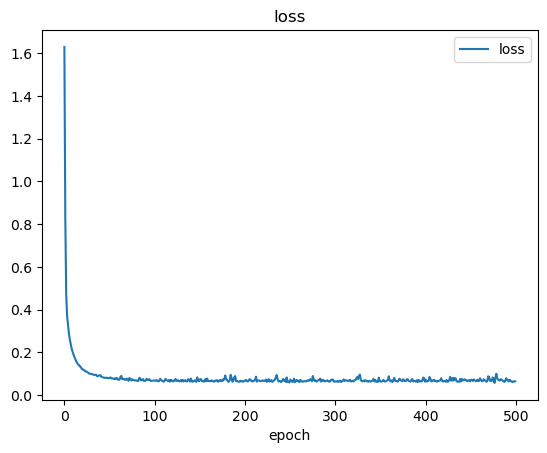

In [9]:
plt.plot(h.history['loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.legend(['loss'])

In [12]:
# function to plot output where X is the dataset, y is the labelled matrix data, and model is the sequential model
# correlates each specific coordinate with its respecitve preduction probability and plots contour zones 
# yellow = 1 purple = 0 
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1)
    y_span = np.linspace(min(X[:, 1]) - 1, max(X[:, 1]) + 1)
    # return coordinate matricies from the input of the coordinate vectors
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_,yy_]
    pred_func = model.predict(grid)
    Z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, Z)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


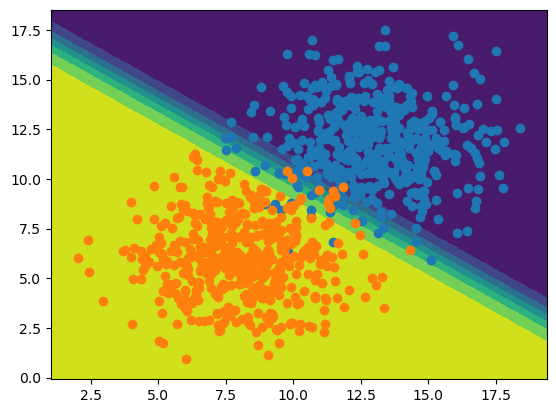

In [14]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predition is: [[0.9999972]]


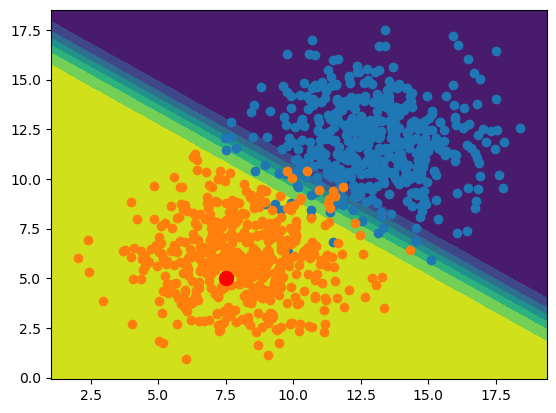

In [15]:
# test to see the model prediction for a new selected point
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
x = 7.5
y = 5
point = np.array([[x, y]])
prediction = model.predict(point)
plt.plot([x], [y], marker = "o", markersize = 10, color = "red")
print("Predition is:", prediction)